In [ ]:
import pandas as pd
import os

dyad_df = pd.read_parquet('data_dyad_monthly_v0.6.parquet')

In [222]:

train_dyad_df = pd.read_parquet('data_dyad_monthly_nn/train_df_2019.parquet')
tests_dyad_df = pd.read_parquet('data_dyad_monthly_nn/test_df_2019.parquet')

In [224]:
# print all unique months
# print(tests_dyad_df['date'].unique())
# get train dataset to be '2017-09-01 00:00:00', '2017-10-01 00:00:00' dates
train_dyad_df = train_dyad_df[train_dyad_df['date'] >= '2017-01-01 00:00:00']
tests_dyad_df = tests_dyad_df[
    (tests_dyad_df['date'] >= '2017-11-01 00:00:00') & (tests_dyad_df['date'] <= '2017-12-01 00:00:00')]
print(train_dyad_df['date'].unique())
print(tests_dyad_df['date'].unique())
print(len(train_dyad_df))
print(len(tests_dyad_df))

<DatetimeArray>
['2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '2017-04-01 00:00:00', '2017-05-01 00:00:00', '2017-06-01 00:00:00',
 '2017-07-01 00:00:00', '2017-08-01 00:00:00', '2017-09-01 00:00:00',
 '2017-10-01 00:00:00']
Length: 10, dtype: datetime64[ns]
<DatetimeArray>
['2017-11-01 00:00:00', '2017-12-01 00:00:00']
Length: 2, dtype: datetime64[ns]
181450
36290


In [225]:
train_dyad_df

,month_id,date,country_id_a,country_id_b,a_ged_sb,b_ged_sb,a_country_name,b_country_name,a_gleditsch_ward,b_gleditsch_ward,...,b_splag_1_decay_ged_sb_5,b_splag_1_decay_ged_os_5,b_splag_1_decay_ged_ns_5,ratio_wdi_sp_pop_totl,ratio_ged_sb,ratio_wdi_sp_dyn_imrt_in,ratio_vdem_v2x_ex_military,ratio_wdi_ms_mil_xpnd_zs,a_ged_sb_15_shifted,b_ged_sb_15_shifted
60,445,2017-01-01,1,2,0.0,0.0,Guyana,Suriname,110,115,...,-0.847668,-0.691402,0.144055,-0.037113,-0.090293,-0.230622,-0.440838,0.413936,-0.100619,-0.106359
61,446,2017-02-01,1,2,0.0,0.0,Guyana,Suriname,110,115,...,-0.847668,-0.693740,0.192464,-0.037113,-0.090293,-0.230622,-0.440838,0.413936,-0.100619,-0.106359
62,447,2017-03-01,1,2,0.0,0.0,Guyana,Suriname,110,115,...,-0.847668,-0.696011,0.167910,-0.037113,-0.090293,-0.230622,-0.440838,0.413936,-0.100619,-0.106359
63,448,2017-04-01,1,2,0.0,0.0,Guyana,Suriname,110,115,...,-0.847668,-0.698218,0.192464,-0.037113,-0.090293,-0.230622,-0.440838,0.413936,-0.100619,-0.106359
64,449,2017-05-01,1,2,0.0,0.0,Guyana,Suriname,110,115,...,-0.847668,-0.700361,0.192464,-0.037113,-0.090293,-0.230622,-0.440838,0.413936,-0.100619,-0.106359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141057,450,2017-06-01,245,246,3.0,32.0,Sudan,South Sudan,625,626,...,2.405110,3.122667,4.140945,-0.037113,-0.089747,-0.360734,-0.006209,0.133004,0.158634,-0.059945
2141058,451,2017-07-01,245,246,0.0,33.0,Sudan,South Sudan,625,626,...,2.350338,3.076546,4.102202,-0.037113,-0.090293,-0.360734,-0.006209,0.133004,-0.079879,-0.097076
2141059,452,2017-08-01,245,246,0.0,20.0,Sudan,South Sudan,625,626,...,2.297124,3.183799,4.040007,-0.037113,-0.090293,-0.360734,-0.006209,0.133004,0.132709,-0.106359
2141060,453,2017-09-01,245,246,19.0,32.0,Sudan,South Sudan,625,626,...,2.245426,3.237953,3.979584,-0.037113,-0.086833,-0.360734,-0.006209,0.133004,-0.053954,-0.033953


In [226]:
from utilities import views_month_id_to_date

# load benchmark model
prediction_year = 2019
model_names = {
    "bootstrap": "bm_cm_bootstrap_expanded_",
    "poisson": "bm_cm_last_historical_poisson_expanded_",
}
benchmark_model = pd.read_parquet(f'Benchmarks/{model_names["bootstrap"]}{prediction_year}.parquet')
# there is 20 draws per each country per each month. Get the mean of the draws
benchmark_model = benchmark_model.groupby(['month_id', 'country_id']).mean().reset_index()
# add date column
benchmark_model['date'] = views_month_id_to_date(benchmark_model['month_id'])
benchmark_model

,month_id,country_id,outcome,date
0,469,1,30.687,2019-01-01
1,469,2,15.771,2019-01-01
2,469,3,17.758,2019-01-01
3,469,4,17.323,2019-01-01
4,469,5,14.683,2019-01-01
...,...,...,...,...
2287,480,242,18.344,2019-12-01
2288,480,243,19.228,2019-12-01
2289,480,244,24.573,2019-12-01
2290,480,245,31.771,2019-12-01


In [227]:
from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# countries_encoded = encoder.fit_transform(dyad_df[['country_id_a', 'country_id_b']])
# countries_encoded = encoder.transform(dyad_df[['country_id_a', 'country_id_b']])
# countries_encoded = pd.DataFrame(countries_encoded, columns=encoder.get_feature_names(['country_id_a', 'country_id_b']))
# countries_encoded
# trasnform country_id_a and country_id_b to one hot encoding and remove the original columns
# country_a_and_b_ids = dyad_df[dyad_df['country_id_a'], dyad_df['country_id_b']]


# country_a_and_b_ids = dyad_df[['country_id_a', 'country_id_b']]
# dyad_df = pd.get_dummies(dyad_df, columns=['country_id_a', 'country_id_b'], drop_first=False, dtype=int)
# # merge back country_id_a and country_id_b
# dyad_df = pd.concat([dyad_df, country_a_and_b_ids], axis=1)
# dyad_df

In [228]:
# Explicitly list columns to be dropped before scaling
metadata_columns = ['month_id', 'country_id_a', 'country_id_b', 'date', 'a_ged_sb', 'b_ged_sb', 'a_gleditsch_ward',
                    'b_gleditsch_ward', 'a_country_name', 'b_country_name']
# Also, drop one-hot encoded country identifiers if they are already in the dataframe
metadata_columns.extend(train_dyad_df.filter(regex='^country_id_a_').columns.tolist())
metadata_columns.extend(train_dyad_df.filter(regex='^country_id_b_').columns.tolist())

TARGET_COLUMNS = ['a_ged_sb_15_shifted', 'b_ged_sb_15_shifted']
feature_columns = [col for col in tests_dyad_df.columns if col not in TARGET_COLUMNS and col not in metadata_columns]
test_metadata = tests_dyad_df[metadata_columns]
train_metadata = train_dyad_df[metadata_columns]
input_dim = train_dyad_df[feature_columns].shape[1]
print("feature_columns: ", feature_columns)
print("metadata_columns: ", metadata_columns)

feature_columns:  ['a_ged_ns', 'a_ged_os', 'a_acled_sb', 'a_acled_sb_count', 'a_acled_os', 'a_ged_sb_tsum_24', 'a_wdi_sp_pop_totl', 'a_ged_sb_tlag_1', 'a_ged_sb_tlag_2', 'a_ged_sb_tlag_3', 'a_ged_sb_tlag_4', 'a_ged_sb_tlag_5', 'a_ged_sb_tlag_6', 'a_ged_os_tlag_1', 'a_wdi_ag_lnd_frst_k2', 'a_wdi_dt_oda_odat_pc_zs', 'a_wdi_ms_mil_xpnd_gd_zs', 'a_wdi_ms_mil_xpnd_zs', 'a_wdi_nv_agr_totl_kd', 'a_wdi_nv_agr_totl_kn', 'a_wdi_ny_gdp_pcap_kd', 'a_wdi_sp_dyn_le00_in', 'a_wdi_se_enr_prim_fm_zs', 'a_wdi_se_enr_prsc_fm_zs', 'a_wdi_se_prm_nenr', 'a_wdi_sh_sta_maln_zs', 'a_wdi_sh_sta_stnt_zs', 'a_wdi_sl_tlf_totl_fe_zs', 'a_wdi_sm_pop_refg_or', 'a_wdi_sm_pop_netm', 'a_wdi_sm_pop_totl_zs', 'a_wdi_sp_dyn_imrt_in', 'a_wdi_sh_dyn_mort_fe', 'a_wdi_sp_pop_14_fe_zs', 'a_wdi_sp_pop_1564_fe_zs', 'a_wdi_sp_pop_65up_fe_zs', 'a_wdi_sp_pop_grow', 'a_wdi_sp_urb_totl_in_zs', 'a_splag_wdi_sl_tlf_totl_fe_zs', 'a_splag_wdi_sm_pop_refg_or', 'a_splag_wdi_sm_pop_netm', 'a_splag_wdi_ag_lnd_frst_k2', 'a_vdem_v2x_delibdem', 

In [229]:
train_dyad_df[feature_columns].shape[1]

253

In [230]:
import numpy
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(42)
numpy.random.seed(42)


class CountryDyadDataset(Dataset):
    def __init__(self, dataframe, feature_columns):
        self.features = torch.tensor(dataframe[feature_columns].values, dtype=torch.float)
        self.targets = torch.tensor(dataframe[TARGET_COLUMNS].values, dtype=torch.float)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [300]:
train_dataset = CountryDyadDataset(train_dyad_df, feature_columns)
test_dataset = CountryDyadDataset(tests_dyad_df, feature_columns)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

train_loader_full = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=False)
test_loader_full = DataLoader(dataset=test_dataset, batch_size=len(test_dataset), shuffle=False)


In [301]:


class MultipleLinearRegression(torch.nn.Module):
    def __init__(self, input_dim):
        super(MultipleLinearRegression, self).__init__()
        self.dropout = torch.nn.Dropout(0.4)
        self.linear = torch.nn.Linear(input_dim, 100)  # Output dimension is 2 for a_ged_sb and b_ged_sb
        self.LeakyReLU = torch.nn.LeakyReLU()
        self.dropout2 = torch.nn.Dropout(0.4)
        self.linear2 = torch.nn.Linear(100, 2)

    def forward(self, x):
        # x = self.dropout(x)
        x = self.linear(x)
        x = self.LeakyReLU(x)
        x = self.dropout2(x)
        return self.linear2(x)


model = MultipleLinearRegression(input_dim)
# mps_device = torch.device("mps")
# model.to(mps_device)  # Move the model to the MPS device
# move inputs to MPS device

In [302]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.MSELoss()

In [303]:

losses = {"train": [], "test": []}
epochs = 20
for epoch in range(epochs):
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        #losses.append(loss.item())
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        model.eval()
        for x, y in test_loader_full:
            y_pred = model(x)
            loss = criterion(y_pred, y)
            losses["test"].append(loss.item())

        for x, y in train_loader_full:
            y_pred = model(x)
            loss = criterion(y_pred, y)
            losses["train"].append(loss.item())

    print(f"Epoch {epoch + 1}, Loss Train: {losses['train'][-1]} Loss Test: {losses['test'][-1]}")
print("Done training!")

Epoch 1, Loss Train: 0.02159133180975914 Loss Test: 0.03101591020822525
Epoch 2, Loss Train: 0.014267482794821262 Loss Test: 0.0282795038074255
Epoch 3, Loss Train: 0.012290463782846928 Loss Test: 0.024133382365107536
Epoch 4, Loss Train: 0.010385390371084213 Loss Test: 0.02573968842625618
Epoch 5, Loss Train: 0.009026087820529938 Loss Test: 0.03045627661049366
Epoch 6, Loss Train: 0.008622980676591396 Loss Test: 0.02826603129506111
Epoch 7, Loss Train: 0.007910815998911858 Loss Test: 0.029400838539004326
Epoch 8, Loss Train: 0.0069045135751366615 Loss Test: 0.032411977648735046
Epoch 9, Loss Train: 0.00630295742303133 Loss Test: 0.033557623624801636
Epoch 10, Loss Train: 0.005736254621297121 Loss Test: 0.03553922474384308
Epoch 11, Loss Train: 0.005406578071415424 Loss Test: 0.03953259438276291
Epoch 12, Loss Train: 0.005429705139249563 Loss Test: 0.0381738543510437
Epoch 13, Loss Train: 0.0053392560221254826 Loss Test: 0.03741796687245369
Epoch 14, Loss Train: 0.005132694728672504 Lo

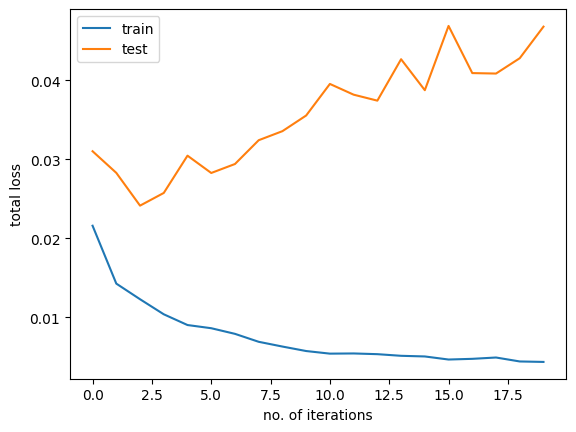

In [304]:
# Plot the losses
plt.plot(losses["train"], label="train")
plt.plot(losses["test"], label="test")
plt.legend()
plt.xlabel("no. of iterations")
plt.ylabel("total loss")
plt.show()


In [305]:
len(losses)

2

In [306]:
model.eval()  # Set the model to evaluation mode
predictions = []
actuals = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)  # Generate predictions
        predictions.append(outputs)
        actuals.append(labels)

# Depending on your specific needs, you might want to concatenate all batches' predictions and actuals
predictions = torch.cat(predictions, dim=0)
actuals = torch.cat(actuals, dim=0)

In [307]:
mse = torch.nn.functional.mse_loss(predictions, actuals)
print(f"Test MSE: {mse.item()}")

Test MSE: 0.0467812679708004


In [308]:
predictions.shape
actuals.shape

torch.Size([36290, 2])

In [309]:

# Convert tensors to numpy arrays
predictions_np = predictions.numpy()
actuals_np = actuals.numpy()

# Convert arrays to pandas DataFrame
predictions_df = pd.DataFrame(predictions_np, columns=['a_ged_sb_pred', 'b_ged_sb_pred'])
# actuals_df = pd.DataFrame(actuals_np, columns=['a_ged_sb_actual', 'b_ged_sb_actual'])

In [310]:
# merge with test df
tests_dyad_df = tests_dyad_df.reset_index(drop=True)

In [311]:
tests_dyad_df = pd.concat([tests_dyad_df, predictions_df], axis=1)

In [312]:
tests_dyad_df

,month_id,date,country_id_a,country_id_b,a_ged_sb,b_ged_sb,a_country_name,b_country_name,a_gleditsch_ward,b_gleditsch_ward,...,a_ged_sb_pred,b_ged_sb_pred,a_ged_sb_pred,b_ged_sb_pred,a_ged_sb_pred,b_ged_sb_pred,a_ged_sb_pred,b_ged_sb_pred,a_ged_sb_pred,b_ged_sb_pred
0,455,2017-11-01,1,2,0.0,0.0,Guyana,Suriname,110,115,...,-0.081583,-0.092548,-0.111493,-0.106492,-0.088383,-0.090680,-0.138148,-0.108733,-0.114389,-0.093257
1,456,2017-12-01,1,2,0.0,0.0,Guyana,Suriname,110,115,...,-0.081643,-0.092567,-0.111597,-0.106526,-0.088028,-0.090705,-0.138433,-0.108704,-0.114166,-0.093359
2,455,2017-11-01,1,3,0.0,0.0,Guyana,Trinidad and Tobago,110,52,...,-0.084435,-0.096850,-0.088683,-0.106065,-0.101125,-0.104692,-0.092830,-0.108509,-0.101856,-0.109403
3,456,2017-12-01,1,3,0.0,0.0,Guyana,Trinidad and Tobago,110,52,...,-0.084489,-0.096883,-0.088847,-0.106118,-0.101239,-0.104758,-0.092806,-0.108525,-0.102014,-0.109410
4,455,2017-11-01,1,4,0.0,0.0,Guyana,Venezuela,110,101,...,-0.082966,-0.088167,-0.078116,-0.097370,-0.103205,-0.108526,-0.100290,-0.106967,-0.090775,-0.105536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36285,456,2017-12-01,244,245,0.0,4.0,Mauritania,Sudan,435,625,...,-0.085895,-0.058113,-0.085616,-0.077180,-0.099400,-0.064016,-0.103478,-0.037597,-0.122028,-0.068548
36286,455,2017-11-01,244,246,0.0,88.0,Mauritania,South Sudan,435,626,...,-0.075250,-0.031229,-0.091484,-0.059591,-0.098267,-0.040537,-0.095804,-0.018288,-0.105184,-0.058045
36287,456,2017-12-01,244,246,0.0,62.0,Mauritania,South Sudan,435,626,...,-0.075467,-0.033771,-0.094748,-0.063307,-0.094961,-0.072313,-0.108325,-0.054578,-0.112533,-0.072007
36288,455,2017-11-01,245,246,26.0,88.0,Sudan,South Sudan,625,626,...,-0.039830,-0.031916,-0.023779,-0.071019,0.057943,-0.032662,0.183667,-0.016353,0.074069,-0.087647


In [313]:
def aggregate_country_month_data(dyad_df):
    """
    Aggregates a dyad DataFrame by country and month, including specified shifted values for ged_sb.

    Parameters:
    - dyad_df: The input DataFrame containing dyadic data.
    - a_ged_sb_shifted_name: The column name for shifted a_ged_sb values.
    - b_ged_sb_shifted_name: The column name for shifted b_ged_sb values.

    Returns:
    - A DataFrame aggregated by month and country, including mean ged_sb and shifted ged_sb values.
    """
    # Step 1: Prepare separate DataFrames for each country role
    df_a = dyad_df[
        ['month_id', 'date', 'country_id_a', 'a_country_name', 'a_ged_sb_15_shifted', 'a_ged_sb_pred']].copy()
    df_b = dyad_df[
        ['month_id', 'date', 'country_id_b', 'b_country_name', 'b_ged_sb_15_shifted', 'b_ged_sb_pred']].copy()

    # Step 2: Rename columns for consistency
    df_a.rename(columns={'country_id_a': 'country_id', 'a_country_name': 'country_name',
                         'a_ged_sb_15_shifted': 'ged_sb_actual', 'a_ged_sb_pred': 'ged_sb_pred'}, inplace=True)
    df_b.rename(columns={'country_id_b': 'country_id', 'b_country_name': 'country_name',
                         'b_ged_sb_15_shifted': 'ged_sb_actual', 'b_ged_sb_pred': 'ged_sb_pred'}, inplace=True)

    # Step 3: Concatenate and group
    combined_country_df = pd.concat([df_a, df_b], ignore_index=True)
    aggregated_df = combined_country_df.groupby(['month_id', 'date', 'country_id', 'country_name']).agg(
        {'ged_sb_actual': 'mean', 'ged_sb_pred': 'mean'}).reset_index()

    return aggregated_df


In [314]:

# Convert back to country months
test_df = aggregate_country_month_data(tests_dyad_df)
# rename to the same names as in XGBoost
target = 'y_shifted'
test_df = test_df.rename(columns={"ged_sb_actual": target, "ged_sb_pred": 'predictions'})
test_df

TypeError: mean() got an unexpected keyword argument 'engine_kwargs'

In [ ]:
# # plot 
# # Create subplot for current month
# # plt.subplot(grid_size_x, grid_size_y, index)
# plt.scatter(actuals[0], predictions[0], color='blue', label='Actual vs Predicted', alpha=0.5)
# # print current_date in YY/MM format
# # print_date = current_date.strftime('%Y-%m')
# plt.title(f'All - RMSE: {mse.item():.2f}')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# # plt.xscale('log')
# # plt.yscale('log')
# plt.plot([0, 20], [0, 20], color='red', label='45 degree line')
# plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Assuming test_df is your DataFrame, and 'target' and 'predictions' are columns in it
unique_months = test_df['month_id'].unique()
n_months = len(unique_months)

# Calculate the grid size for the subplot (simple square root approximation for a square grid)
grid_size_x = int(n_months ** 0.5) + (1 if n_months % int(n_months ** 0.5) else 0)
grid_size_y = grid_size_x + 1

PLOT_LOG = False
if PLOT_LOG:
    # apply shift
    shift_val = min(test_df[target].min(), test_df['predictions'].min())
    test_df['predictions_moved'] = test_df['predictions'] + abs(shift_val) + 0.0001
    test_df[target + "_moved"] = test_df[target] + abs(shift_val) + 0.0001
    actuals_col = target + "_moved"
    predictions_col = "predictions_moved"
else:
    actuals_col = target
    predictions_col = "predictions"

# print(f'Grid size: {grid_size}')
# Set overall figure size
plt.figure(figsize=(grid_size_x * 6, grid_size_y * 3))  # Adjust the size factors (6, 4) based on your preference

for index, month_id in enumerate(unique_months, start=1):
    this_month = test_df[test_df['month_id'] == month_id]
    mean_sq_error = sqrt(mean_squared_error(this_month[target], this_month['predictions']))
    print("Countries in this month: ", this_month['country_id'].unique())
    current_date = this_month["date"].iloc[0]
    target_month = this_month[actuals_col]
    predictions_month = this_month[predictions_col]

    # Create subplot for current month
    plt.subplot(grid_size_x, grid_size_y, index)
    plt.scatter(target_month, predictions_month, color='blue', label='Actual vs Predicted', alpha=0.5)
    # print current_date in YY/MM format
    print_date = current_date.strftime('%Y-%m')
    plt.title(f'Date {print_date} - RMSE: {mean_sq_error:.2f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    if PLOT_LOG:
        plt.xscale('log')
        plt.yscale('log')
    plt.plot([0, 4], [0, 4], color='red', label='45 degree line')
    plt.legend()
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



In [ ]:
# check how many actuals are 0
test_df['predictions_log'] = test_df['predictions'].apply(lambda x: numpy.log(x))
test_df['target_log'] = test_df[target].apply(lambda x: numpy.log(x))
# shift by min value to avoid negative values + 0.0001


In [ ]:
torch.backends.mps.is_available()

In [ ]:
next(model.parameters()).device

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

country_list = pd.read_csv('data/country_list.csv')

country_ids = test_df['country_id'].unique().tolist()
# drop country if all actuals are 0
# [country_ids.remove(country_id) for country_id in country_ids if test_df[test_df['country_id'] == country_id][target].sum() == 0]

for country_id in country_ids:
    # Data for this country
    this_country_test = test_df[test_df['country_id'] == country_id]
    # this_country_train = train_df[train_df['country_id'] == country_id]
    country_name = country_list[country_list['country_id'] == country_id]['name'].values[0]

    # skip country if all actuals are 0
    if this_country_test[target].sum() == 0:
        print(f"Skipping {country_name} as all actuals are 0")
        continue

    plt.figure(figsize=(10, 6))

    # Plot training data
    # plt.plot(this_country_train['date'], this_country_train[target], label=f'{country_name} Train', color='gray',
    #          linestyle='-', marker='')

    # Plot test actual data
    plt.plot(this_country_test['date'], this_country_test[target], label=f'{country_name} Test Actual', color='blue',
             linestyle='-', marker='')

    # Plot predicted data
    plt.plot(this_country_test['date'], this_country_test['predictions'], label=f'{country_name} Predicted',
             color='red', linestyle='-', marker='')

    # plot benchmark
    benchmark_country = benchmark_model[benchmark_model['country_id'] == country_id]
    plt.plot(benchmark_country['date'], benchmark_country['outcome'], label=f'{country_name} Benchmark', color='green',
             linestyle='--', marker='')

    # # plot actuals
    # actuals_country = actuals_model[actuals_model['country_id'] == country_id]
    # plt.plot(actuals_country['date'], actuals_country['ged_sb'], label=f'{country_name} Actuals', color='purple',
    #          linestyle='--', marker='')

    # Adding title and labels
    plt.title(f"Actual vs Predicted Values for {country_name}")
    plt.xlabel("Date")
    plt.ylabel("Total number of battle-related deaths from state-based conflict")
    plt.legend()

    # Show plot
    plt.show()